# Installing Dependencies

In [72]:
%pip install python-decouple --quiet
%pip install imouapi --quiet
%pip install matplotlib --quiet
%pip install numpy --quiet
%pip install pandas --quiet
%pip install opencv-python --quiet
%pip install pillow --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [73]:
from imouapi.api import ImouAPIClient
from imouapi.device import ImouDiscoverService
from imouapi.device import ImouDevice
from imouapi.device_entity import ImouCamera
from imouapi.const import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import json
from decouple import config
import time
import aiohttp
import io

In [74]:
# Load the configuration from the config.json file
config_file = 'config.json'
config_data = {}
try:
    with open(config_file) as json_file:
        config_data = json.load(json_file)
        
except Exception as e:
    print(f'Error: {e}')
    
# Get the configuration data
IMOU_APP_ID = config('IMOU_APP_ID', default=config_data.get('IMOU_APP_ID', ''))
IMOU_APP_SECRET = config('IMOU_APP_SECRET', default=config_data.get('IMOU_APP_SECRET', ''))

In [75]:
session = aiohttp.ClientSession()

api_client = ImouAPIClient(
    app_id=IMOU_APP_ID,
    app_secret=IMOU_APP_SECRET,
    session=session
)

In [76]:
discover_service = ImouDiscoverService(
    api_client=api_client
)

In [77]:
discovered_devices = await discover_service.async_discover_devices()

In [78]:
discovered_device = ""
for device in discovered_devices:
    print(device, discovered_devices[device].get_device_id())
    discovered_device = device

Front Door 6K0720CPAZ972BE


In [79]:
device = ImouDevice(
    api_client=api_client,
    device_id=discovered_devices[discovered_device].get_device_id(),
)

In [80]:
camera = ImouCamera(
    api_client=api_client,
    device_id=device.get_device_id(),
    device_name=device.get_name(),
    sensor_type="cameraSD",
    profile="SD",
)

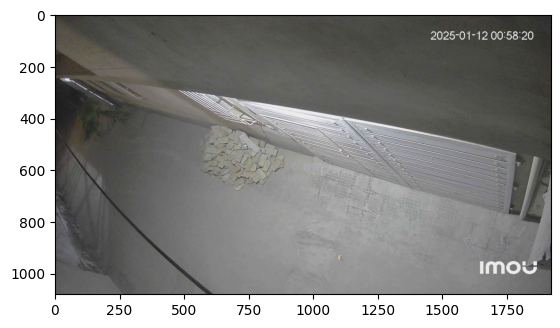

In [81]:
image = await camera.async_get_image()

image_stream = io.BytesIO(image)
image = Image.open(image_stream)

plt.imshow(image)
plt.show()